# Working notebooks

In [1]:
import altair as alt
import pandas as pd
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [3]:
movies = pd.read_json("../data/raw/lab2-movies.json")
movies.head()

,id,title,runtime,budget,revenue,vote_average,vote_count,genres,studios
0,12,Finding Nemo,100,94000000,940335536,3.86,33887,[Animation],[Pixar Animation Studios]
1,13,Forrest Gump,142,55000000,677945399,4.05,91921,"[Romance, Comedy, Drama]",[Paramount Pictures]
2,14,American Beauty,122,15000000,356296601,4.13,57879,[Drama],[DreamWorks SKG]
3,16,Dancer in the Dark,140,12800000,40031879,3.84,4571,[Drama],[Canal+]
4,22,Pirates of the Caribbean: The Curse of the Bla...,143,140000000,655011224,3.81,36337,[Action],[Walt Disney Pictures]


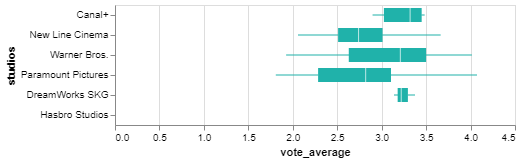

In [4]:
boom_movies = movies.explode('studios').explode('genres')
studios_by_revenue = boom_movies.groupby('studios')['revenue'].median().sort_values().index.tolist()
xgenre = 'Horror'  
chart= alt.Chart(boom_movies[boom_movies['genres']==xgenre]).mark_boxplot(color = "#20B2AA").encode(
        alt.X('vote_average'),
        alt.Y('studios', sort = studios_by_revenue),
        tooltip='title').interactive()
chart

In [5]:
boom_movies['genres'].unique()

array(['Animation', 'Romance', 'Comedy', 'Drama', 'Action',
       'Science Fiction', 'History', 'Horror', 'War'], dtype=object)

# Milestone 2:  App development with layout

In [17]:
movies.sort_values('budget')

,id,title,runtime,budget,revenue,vote_average,vote_count,genres,studios
669,15417,Every Which Way But Loose,110,5,85,2.77,654,"[Action, Romance, Comedy]",[Warner Bros.]
677,16340,Rugrats in Paris: The Movie,78,30,103,2.58,834,"[Animation, Comedy]",[Paramount Pictures]
717,30497,The Texas Chain Saw Massacre,83,85000,30859000,3.26,3784,[Horror],[New Line Cinema]
971,299245,The Gallows,87,100000,42664410,2.25,63,[Horror],[New Line Cinema]
323,8193,Napoleon Dynamite,95,400000,46118097,3.34,9508,[Comedy],[Paramount Pictures]
...,...,...,...,...,...,...,...,...,...
776,49529,John Carter,132,260000000,284139100,3.21,2074,"[Action, Science Fiction]",[Walt Disney Pictures]
161,1452,Superman Returns,154,270000000,391081192,2.97,4921,"[Action, Science Fiction]",[Warner Bros.]
849,99861,Avengers: Age of Ultron,141,280000000,1405403694,3.59,5817,"[Action, Science Fiction]",[Marvel Studios]
54,285,Pirates of the Caribbean: At World's End,169,300000000,961000000,3.41,10325,[Action],[Walt Disney Pictures]


In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1007
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1008 non-null   int64  
 1   title         1008 non-null   object 
 2   runtime       1008 non-null   int64  
 3   budget        1008 non-null   int64  
 4   revenue       1008 non-null   int64  
 5   vote_average  1008 non-null   float64
 6   vote_count    1008 non-null   int64  
 7   genres        1008 non-null   object 
 8   studios       1008 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 78.8+ KB


In [19]:
movies['budget'].min()

5

In [20]:
movies['budget'].max()

380000000

In [21]:
movies.query('100_000_000< budget < 200_000_000')

,id,title,runtime,budget,revenue,vote_average,vote_count,genres,studios
4,22,Pirates of the Caribbean: The Curse of the Bla...,143,140000000,655011224,3.81,36337,[Action],[Walt Disney Pictures]
9,74,War of the Worlds,116,132000000,591739379,3.13,9927,[Science Fiction],"[DreamWorks SKG, Paramount Pictures]"
18,98,Gladiator,155,103000000,457640427,3.95,45413,"[Action, Drama]",[DreamWorks SKG]
20,118,Charlie and the Chocolate Factory,115,150000000,474968763,3.23,11606,[Comedy],[Warner Bros.]
27,155,The Dark Knight,152,185000000,1004558444,4.18,39600,"[Action, Drama]",[Warner Bros.]
...,...,...,...,...,...,...,...,...,...
969,297761,Suicide Squad,123,175000000,745600054,2.88,1805,"[Action, Science Fiction]",[Warner Bros.]
970,297762,Wonder Woman,141,149000000,820580447,3.75,659,[Action],[Warner Bros.]
977,308531,Teenage Mutant Ninja Turtles: Out of the Shadows,112,135000000,245623848,2.81,312,"[Action, Comedy]",[Paramount Pictures]
979,315837,Ghost in the Shell,107,110000000,169801921,3.33,456,"[Action, Science Fiction]","[DreamWorks SKG, Paramount Pictures]"
